In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',0)

In [8]:
#bring in the six packs
data_dict = pd.read_csv('DataDictionaryWiDS2021.csv')
df = pd.read_csv('TrainingWiDS2021.csv')
df1= pd.read_csv('UnlabeledWiDS2021.csv')
df.shape

(130157, 181)

In [9]:
data_dict

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,demographic,age,Years,numeric,The age of the patient on unit admission,None
3,demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admi...,21.5
4,demographic,elective_surgery,None,binary,Whether the patient was admitted to the hospit...,0
5,demographic,ethnicity,None,string,The common national or cultural tradition whic...,Caucasian
6,demographic,gender,None,string,The genotypical sex of the patient,F
7,demographic,height,centimetres,numeric,The height of the person on unit admission,180
8,demographic,hospital_admit_source,None,string,The location of the patient prior to being adm...,Home
9,demographic,icu_admit_source,None,string,The location of the patient prior to being adm...,Operating room


In [10]:
df.head(10)

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,...,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.39,4.0,...,11.6,11.6,34.0,34.0,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
5,6,182697,83,67.0,27.555611,0,Caucasian,M,190.5,Direct Admit,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,100.0,NaN,301.0,403.01,0,0,NaN,13.0,0.71,NaN,4.0,6.0,0.0,5.0,156.0,113.0,44.2,0,130.0,NaN,NaN,NaN,NaN,35.0,...,NaN,NaN,NaN,NaN,1.1,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
6,7,195124,83,59.0,57.451002,0,Caucasian,F,165.1,Operating Room,Accident & Emergency,95,admit,Med-Surg ICU,0.000694,0,156.6,NaN,108.0,203.01,0,0,NaN,18.0,0.78,1.0,4.0,6.0,0.0,5.0,197.0,133.0,33.5,1,138.0,43.0,43.0,370.0,7.42,53.0,...,10.7,10.7,33.5,33.5,NaN,NaN,NaN,NaN,278.0,278.0,4.2,4.2,135.0,135.0,5.9,5.9,43.0,43.0,7.42,7.42,370.0,370.0,370.0,370.000000,43.0,43.0,7.42,7.42,370.0,370.0,370.0,370.0,0,0,0,0,0,0,0,1
7,8,179261,33,70.0,NaN,0,Caucasian,M,165.0,Emergency Department,Accident & Emergency,91,admit,Med-Surg ICU,0.0

In [11]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df1.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df.describe()

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.000000,130157.000000,125169.000000,125667.000000,130157.000000,128080.000000,130157.000000,130157.000000,130157.0,126694.000000,51994.000000,128472.000000,129292.000000,130157.000000,130157.000000,47597.000000,104746.000000,105275.000000,30437.000000,127967.000000,127967.000000,129448.000000,127967.000000,115461.000000,129848.000000,103399.000000,130157.000000,129737.000000,30437.000000,30437.000000,30437.000000,30437.000000,129349.000000,105638.00000,123546.000000,66990.000000,130157.000000,100682.000000,35089.000000,35089.000000,...,27367.000000,27367.000000,27201.000000,27201.000000,48944.000000,48944.000000,11690.000000,11690.000000,24428.000000,24428.000000,29336.000000,29336.000000,28376.000000,28376.000000,24171.000000,24171.000000,45696.000000,45696.000000,45350.000000,45350.000000,46147.000000,46147.000000,36818.000000,36818.000000,22491.000000,22491.000000,22308.000000,22308.000000,22712.000000,22712.000000,16760.000000,16760.000000,130157.00000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000
mean,213000.856519,106.102131,61.995103,29.110260,0.189840,169.607219,662.428344,0.839933,0.0,83.791104,2.886149,185.492683,565.994296,0.207111,0.027997,1.201222,25.718070,1.481629,0.595735,3.488290,5.484828,0.011441,4.030203,160.141416,99.854530,32.975817,0.156626,87.193046,42.161246,42.161246,132.061737,7.352154,25.150603,137.94526,36.420638,1800.803417,0.330432,12.187662,79.261563,46.969706,...,11.204166,11.088205,33.731830,33.349796,1.577788,1.463473,3.028198,2.976982,193.943057,193.123506,4.188984,4.147028,138.167205,137.879814,13.387873,13.336485,45.341451,38.535587,7.387687,7.322903,165.003814,102.957476,287.600071,224.005403,44.552966,43.341081,7.337283,7.327771,163.035835,145.949537,247.525419,239.617358,0.00103,0.016081,0.013599,0.025669,0.007307,0.004187,0.020852,0.216285
std,38109.828146,63.482277,16.822880,8.262776,0.392176,10.833085,304.259843,2.485337,0.0,24.963063,0.689812,85.858208,466.510850,0.405238,0.164965,2.351994,20.690041,1.543535,0.262922,0.939831,1.271039,0.106349,1.538528,90.701327,30.759505,6.834576,0.363449,41.908109,12.267414,12.267414,84.958826,0.098423,15.024730,5.30384,0.857584,1456.551481,0.470370,6.931023,21.693320,12.736433,...,2.350633,2.381224,6.804903,6.963975,0.946477,0.737639,2.898524,2.854953,92.486473,92.692759,0.760183,0.749463,5.711628,5.658036,6.933161,6.915142,14.623775,10.996254,0.085651,0.111530,107.084058,61.514357,130.319620,119.119675,14.631359,14.052015,0.105930,0.108658,112.646743,100.211935,131.440167,128.562211,0.03207,0.125786,0.115819,0.158146,0.085166,0.064574,0.142888,0.411712
min,147000.000000,1.000000,0.000000,14.844926,0.000000,137.200000,82.000000,-0.250

In [17]:
# There is a lot of mismatch in values, we definitely have many missing values.
#First let us analyze data before replacing missing values
((df.isnull().sum())/len(df.age))*1e2

encounter_id                    0.000000
hospital_id                     0.000000
age                             3.832295
bmi                             3.449680
elective_surgery                0.000000
ethnicity                       1.219297
gender                          0.050708
height                          1.595765
hospital_admit_source          25.506120
icu_admit_source                0.184393
icu_id                          0.000000
icu_stay_type                   0.000000
icu_type                        0.000000
pre_icu_los_days                0.000000
readmission_status              0.000000
weight                          2.660633
albumin_apache                 60.052859
apache_2_diagnosis              1.294590
apache_3j_diagnosis             0.664582
apache_post_operative           0.000000
arf_apache                      0.000000
bilirubin_apache               63.431087
bun_apache                     19.523345
creatinine_apache              19.116913
fio2_apache     

In [18]:
df.gender.value_counts()

M    70518
F    59573
Name: gender, dtype: int64

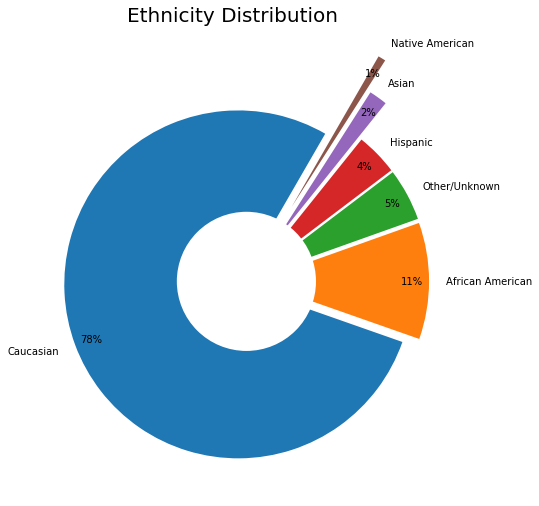

In [23]:
dt_i=[]
dt_fl=[]
dt_o=[]
for col in df.columns:
    x= df[col].dtype
    if x=='int64':
        dt_i.append(col)
    elif x=='float64':
        dt_fl.append(col)
    else:
        dt_o.append(col)
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Ethnicity Distribution', size = 20)
explode = (0.05, 0.05, 0.05, 0.05, 0.3, 0.5)
labels = ["Caucasian","African American","Other/Unknown","Hispanic","Asian","Native American"]
sizes = df["ethnicity"].value_counts()
ax.pie(sizes, explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

#most of the people are caucasian(78%) and very few Native American for missing values we can treat them as caucasian

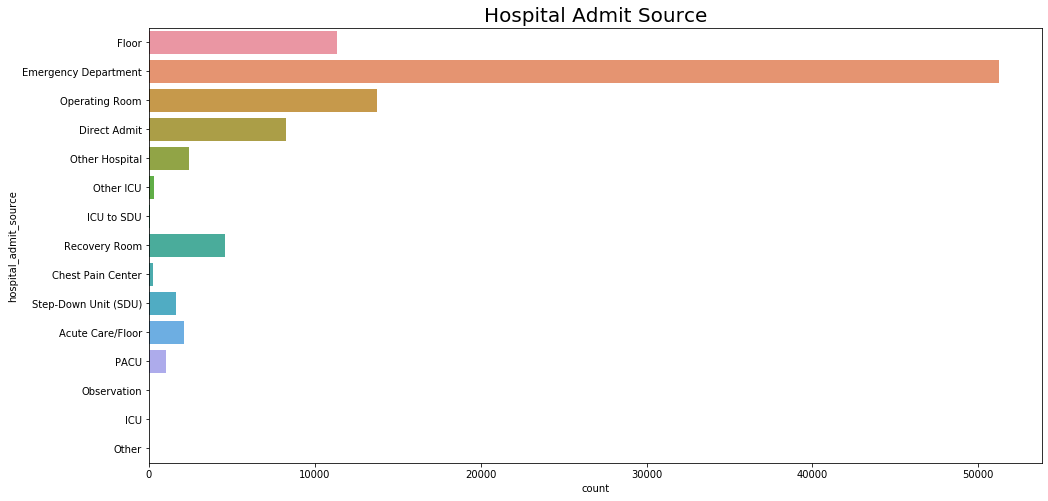

In [30]:
plt.figure(figsize = (16,8))
plt.title('Hospital Admit Source', size = 20)
sns.countplot(y ='hospital_admit_source', data = df); 
# The location of the patient prior to being admitted to the hospital: For most case is Emergency Department

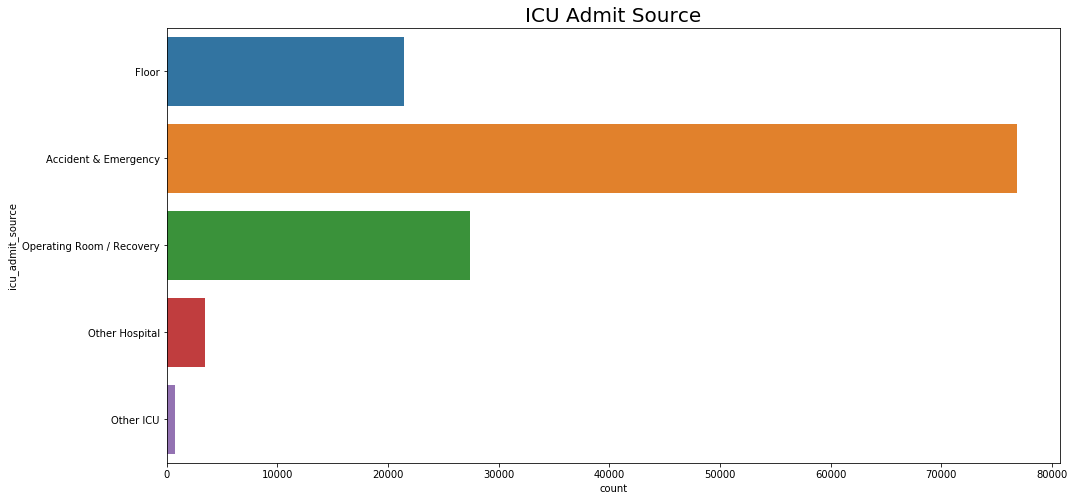

In [31]:
#Just another Demographic
plt.figure(figsize = (16,8))
plt.title('ICU Admit Source', size = 20)
sns.countplot(y ='icu_admit_source', data =df);

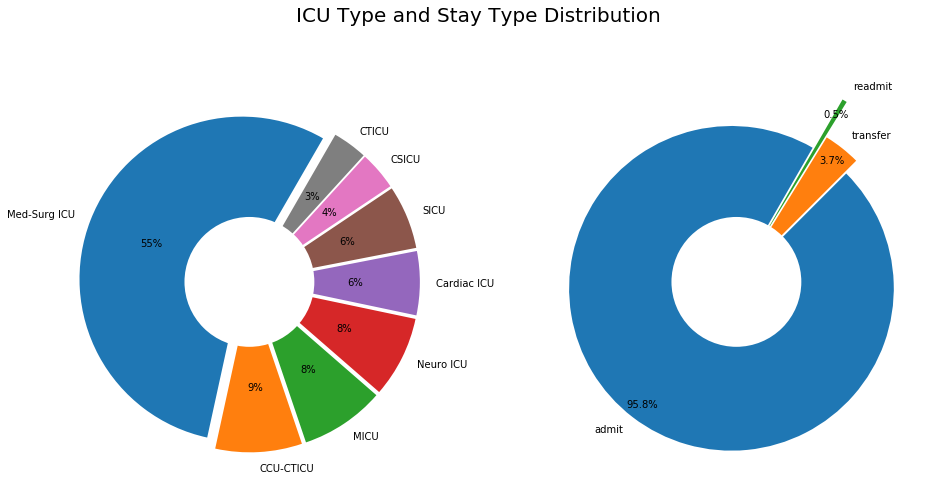

In [35]:
# icu id and icu admit type are useless as unlabelled
#icu type defines the types of icu and stay type distribution explains on stay
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('ICU Type and Stay Type Distribution', size = 20)
axs = [ax1, ax2]

explode = (0.05, 0.05,0.05, 0.05,0.05, 0.05,0.05, 0.05)
labels = ['Med-Surg ICU', 'CCU-CTICU', 'MICU','Neuro ICU', 'Cardiac ICU', 'SICU','CSICU','CTICU']
sizes = df['icu_type'].value_counts()
ax1.pie(sizes, explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.6)
ax1.add_artist(plt.Circle((0,0),0.4,fc='white'))

explode = (0.05, 0.05, 0.3)
labels = ['admit','transfer', 'readmit']
sizes = df['icu_stay_type'].value_counts()
ax2.pie(sizes, explode=explode, startangle=60, labels=labels,autopct='%1.1f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))

plt.show()

In [36]:
#For numerical columns lets consider co-relation between any parameters, for the most related its close to 90%
# elements like encounter id, hospital id and icu id are unique identifiers so we can drop them
df.corr()

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
encounter_id,1.000000,-0.001463,-0.001376,0.003641,0.001618,0.001393,-0.001498,-0.001066,NaN,0.004438,0.002735,-0.001479,-0.000601,0.000235,-0.000847,-0.005932,0.000167,0.000169,0.000061,0.001883,0.003879,-0.003411,0.004025,0.000740,-0.003655,0.001064,-0.001683,-0.000002,0.013037,0.013037,-0.003911,-0.006254,-0.000321,-0.001485,-0.001900,0.005620,0.000895,0.002625,-0.000695,0.000657,...,0.001521,0.002220,0.002486,0.003321,-0.008840,-0.005428,0.002131,0.001852,0.011094,0.011386,0.000687,-0.000213,-0.000047,0.000849,0.006711,0.006855,0.000952,0.005049,0.000969,0.000536,-0.005189,-0.005392,-0.000522,-0.003028,-0.001192,0.000229,-0.005508,-0.007316,0.007013,0.006573,-0.000578,-0.001582,0.002830,0.000727,-0.002442,-0.000217,-0.001831,0.002531,0.006676,-0.002007
hospital_id,-0.001463,1.000000,-0.019738,0.004834,0.028321,0.022645,0.005414,-0.005174,NaN,0.015188,-0.006945,-0.004676,0.021188,0.026420,0.001426,0.005641,-0.010782,0.000025,-0.023371,-0.006104,-0.012769,-0.031476,-0.010105,-0.003193,-0.001375,0.005983,0.009567,-0.005409,-0.031057,-0.031057,-0.025106,0.022440,-0.040689,0.024976,-0.019533,-0.026741,0.027235,-0.000863,-0.005494,0.037247,...,0.013007,0.010049,0.020458,0.016290,-0.004833,-0.009805,-0.014300,-0.011865,-0.012088,-0.012632,-0.014975,-0.024996,0.044289,0.039567,-0.000664,-0.002618,-0.009158,-0.033799,0.041503,0.005339,-0.000656,-0.025305,0.029790,-0.011275,-0.027806,-0.030583,0.016054,0.014916,-0.021619,-0.034403,0.011336,0.000239,0.000956,0.002127,0.003403,-0.003745,0.002609,0.001734,-0.009420,0.001937
age,-0.001376,-0.019738,1.000000,-0.083176,0.058116,-0.113424,-0.035828,0.049000,NaN,-0.125448,-0.113363,0.021873,-0.062258,0.051249,0.001290,-0.050134,0.237548,0.058980,0.027926,0.030701,0.027903,-0.002532,-0.009352,0.009594,-0.150945,-0.115900,0.004724,-0.020169,0.032291,0.032291,-0.031214,0.044625,0.032616,0.031858,-0.077945,-0.181133,0.033070,-0.012766,-0.188209,-0.255793,...,-0.131076,-0.131654,-0.109433,-0.109977,0.109670,0.122369,0.007132,0.008994,-0.094480,-0.094163,0.044009,0.042770,0.020575,0.019362,-0.054975,-0.054082,0.039286,0.055056,0.041229,0.049871,-0.030793,-0.050375,-0.133895,-0.117401,0.043347,0.037953,0.094864,0.087166,-0.001410,-0.023397,-0.100749,-0.104265,-0.028410,-0.025476,-0.019699,0.021990,0.029104,0.022947,0.026277,0.081019
bmi,0.003641,0.004834,-0.083176,1.000000,0.011846,-0.056617,-0.007218,0.000595,NaN,0.878656,0.057065,0.027004,-0.011806,0.011918,-0.004462,0.004116,0.049204,0.070648,0.041219,0.008824,0.018009,0.006069,0.025739,0.101687,-0.019621,0.096054,0.037912,0.057138,0.182940,0.182940,-0.103279,-0.055671,0.007669,-0.023592,0.038775,0.059055,0.070806,0.031240,0.057008,0.052404,...,0.062960,0.061215,0.085242,0.079215,0.021402,0.026